In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('../../Morning/learningSet.csv')

C:\Users\celia\AppData\Local\Temp\ipykernel_8200\2122290227.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../Morning/learningSet.csv')


In [3]:
numerical = data.select_dtypes(np.number)
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [4]:
categorical = data.select_dtypes('object')
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [5]:
numerical.isna().sum()[numerical.isna().sum() > 0]

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
            ...  
RAMNT_23    87553
RAMNT_24    77674
NEXTDATE     9973
TIMELAG      9973
CLUSTER2      132
Length: 91, dtype: int64

In [6]:
list(numerical.columns)

['ODATEDW',
 'TCODE',
 'DOB',
 'AGE',
 'NUMCHLD',
 'INCOME',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'WEALTH2',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN3',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW1',
 'DW2',
 'DW3',
 

In [7]:
categorical['GEOCODE2'].isna().sum()

132

In [8]:
ml = list(categorical[categorical['GEOCODE2'].notna()].index)
categorical = categorical.loc[ml,:]
numerical = numerical.loc[ml,:]

In [9]:
numerical.shape

(95280, 407)

In [10]:
numerical['WEALTH1'].isna().sum()

44632

In [11]:
numerical['WEALTH1'].describe()

count    50648.000000
mean         5.345601
std          2.742374
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max          9.000000
Name: WEALTH1, dtype: float64

In [12]:
numerical['WEALTH1'].value_counts()

9.0    7580
8.0    6785
7.0    6196
6.0    5823
5.0    5277
4.0    4808
3.0    4233
2.0    4083
1.0    3452
0.0    2411
Name: WEALTH1, dtype: int64

In [13]:
numerical['WEALTH1']

0        NaN
1        9.0
2        1.0
3        4.0
4        2.0
        ... 
95407    NaN
95408    9.0
95409    NaN
95410    NaN
95411    8.0
Name: WEALTH1, Length: 95280, dtype: float64

In [14]:
import seaborn as sns

correlation_matrix = numerical.corr()

In [15]:
correlation_with_target = correlation_matrix['WEALTH1'].sort_values(ascending=False)
correlation_with_target.head(10)

WEALTH1    1.000000
WEALTH2    0.869377
IC4        0.720377
IC2        0.710833
IC3        0.702395
IC1        0.677800
IC10       0.626220
IC19       0.622989
EC7        0.601073
IC20       0.587616
Name: WEALTH1, dtype: float64

In [16]:
from sklearn.impute import KNNImputer

features = ['WEALTH1', 'WEALTH2', 'IC4', 'IC2', 'IC3', 'IC1']

num_data = numerical[features]

imputer = KNNImputer(n_neighbors=5) 

imputed_data = imputer.fit_transform(num_data)

In [17]:
imputed_df = pd.DataFrame(imputed_data, columns=features)

In [18]:
imputed_df['WEALTH1'].isna().sum()

0

In [19]:
imputed_df['WEALTH1'].value_counts()

9.0    9368
8.0    7912
7.0    7268
6.0    6990
5.0    6394
4.0    5962
3.0    5326
2.0    4993
1.0    3998
0.0    2847
3.6    1645
4.8    1168
3.2    1138
5.8    1134
6.2    1110
4.2    1110
6.8    1104
5.2    1097
7.4    1096
7.2    1096
4.4    1082
6.6    1079
4.6    1070
3.4    1068
2.8    1060
3.8    1059
2.6    1057
6.4    1052
5.4    1048
7.8    1027
5.6    1022
2.4    1016
2.2     981
7.6     961
1.8     912
8.2     880
1.6     808
8.8     780
8.4     780
8.6     755
1.4     737
1.2     635
0.8     535
0.4     403
0.6     400
0.2     317
Name: WEALTH1, dtype: int64

In [20]:
numerical['ADI'].isna().sum()

0

<AxesSubplot:>

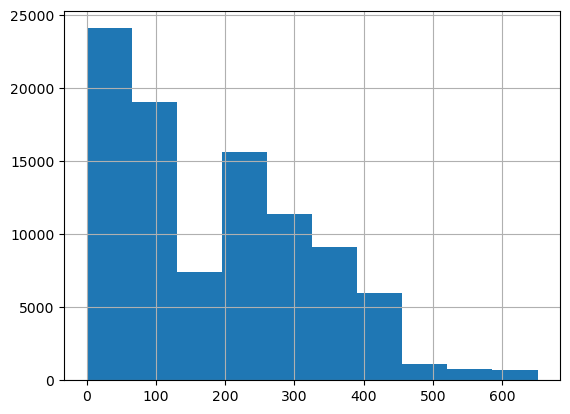

In [21]:
numerical['ADI'].hist()

In [22]:
print(numerical['ADI'].value_counts())

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64


In [30]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

numerical['ADI'] = pt.fit_transform(numerical[['ADI']])


<AxesSubplot:>

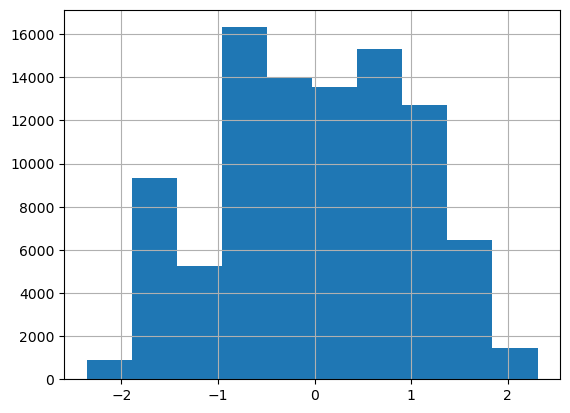

In [31]:
numerical['ADI'].hist()

In [23]:
numerical['DMA'].isna().sum()

0

<AxesSubplot:>

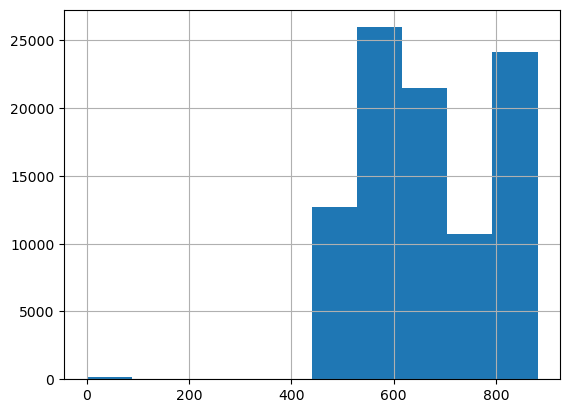

In [24]:
numerical['DMA'].hist()

In [25]:
list(numerical['DMA'].value_counts())

[7296,
 4632,
 3765,
 2839,
 2588,
 2222,
 2079,
 2009,
 1847,
 1780,
 1772,
 1717,
 1651,
 1647,
 1638,
 1583,
 1566,
 1472,
 1316,
 1175,
 1127,
 1085,
 1073,
 1000,
 993,
 955,
 917,
 863,
 813,
 788,
 773,
 754,
 690,
 661,
 656,
 645,
 641,
 640,
 635,
 611,
 597,
 588,
 582,
 567,
 565,
 564,
 548,
 547,
 542,
 512,
 511,
 501,
 488,
 481,
 449,
 436,
 435,
 424,
 422,
 414,
 413,
 403,
 397,
 394,
 387,
 387,
 386,
 384,
 363,
 363,
 363,
 356,
 345,
 343,
 337,
 330,
 327,
 324,
 320,
 320,
 312,
 308,
 305,
 302,
 301,
 290,
 288,
 286,
 283,
 278,
 273,
 271,
 269,
 266,
 259,
 253,
 250,
 247,
 245,
 245,
 244,
 240,
 240,
 229,
 227,
 221,
 217,
 216,
 215,
 214,
 205,
 204,
 202,
 199,
 198,
 192,
 187,
 181,
 181,
 176,
 175,
 169,
 157,
 156,
 150,
 148,
 146,
 142,
 141,
 140,
 138,
 135,
 128,
 128,
 125,
 124,
 122,
 118,
 117,
 113,
 108,
 107,
 104,
 97,
 93,
 91,
 87,
 81,
 80,
 80,
 76,
 73,
 72,
 71,
 71,
 68,
 67,
 66,
 66,
 64,
 64,
 61,
 58,
 58,
 56,
 49,
 40

In [32]:
pt = PowerTransformer()

numerical['DMA'] = pt.fit_transform(numerical[['DMA']])


<AxesSubplot:>

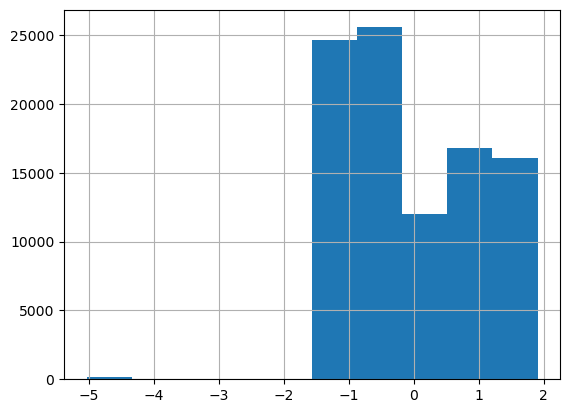

In [33]:
numerical['DMA'].hist()

In [34]:
Q1 = numerical['DMA'].quantile(0.25)
Q3 = numerical['DMA'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical = numerical[(numerical['DMA'] >= lower_bound) & (numerical['DMA'] <= upper_bound)]


<AxesSubplot:>

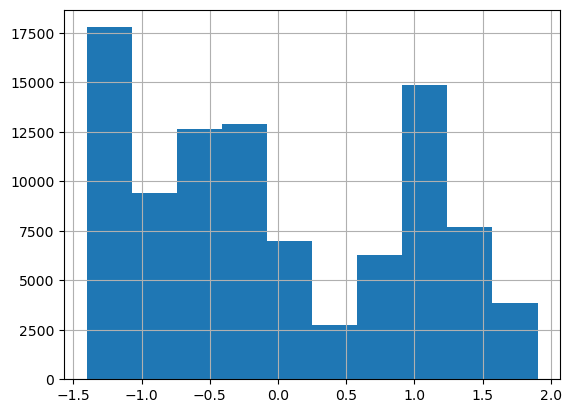

In [35]:
numerical['DMA'].hist()

In [26]:
numerical['MSA'].isna().sum()

0

<AxesSubplot:>

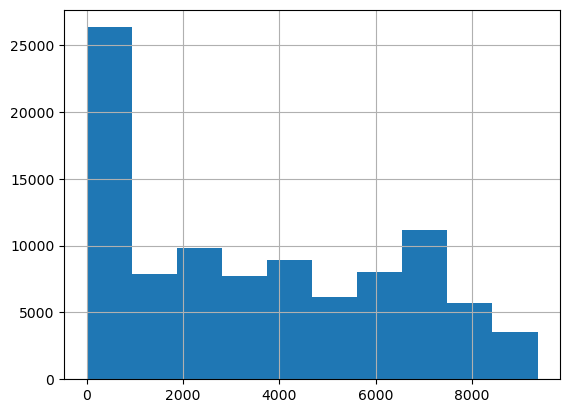

In [27]:
numerical['MSA'].hist()

In [44]:
numerical['MSA'].value_counts()

0.000000    21146
0.767852     4606
0.527131     4059
0.588805     2586
0.344915     1685
            ...  
0.991561        1
0.679731        1
0.996947        1
0.395396        1
0.965411        1
Name: MSA, Length: 298, dtype: int64

In [45]:
pt = PowerTransformer()

numerical['MSA'] = pt.fit_transform(numerical[['MSA']])

In [48]:
Q1 = numerical['MSA'].quantile(0.25)
Q3 = numerical['MSA'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical = numerical[(numerical['MSA'] >= lower_bound) & (numerical['MSA'] <= upper_bound)]

<AxesSubplot:>

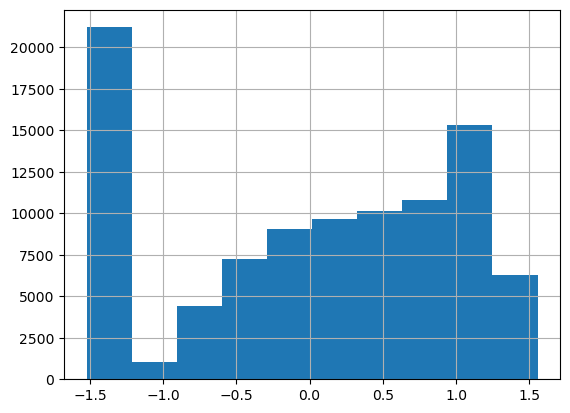

In [49]:
numerical['MSA'].hist()